# Chapter 16: Logistic Regression

In this chapter we will attempt to find decsion boundaries in order to make discrete classification decsions.

### Imports

In [1]:
# Import libraries
import math, my_utils, sys, random, pylab
%matplotlib inline
import matplotlib.pyplot as plt
from functools import reduce, partial

# Import needed notebooks
import NotebookLoader
sys.meta_path.append(NotebookLoader.NotebookFinder())
import Chapter4 as Ch4
import Chapter8 as Ch8
import Chapter11 as Ch11

# set fig size 
pylab.rcParams['figure.figsize'] = (15.0, 12.0)

importing Jupyter notebook from Chapter4.ipynb
importing Jupyter notebook from Chapter8.ipynb
importing Jupyter notebook from Chapter11.ipynb


### Logistic Function

We will use fit a logistic function to our model whose output is the probabilty of being in a certain class

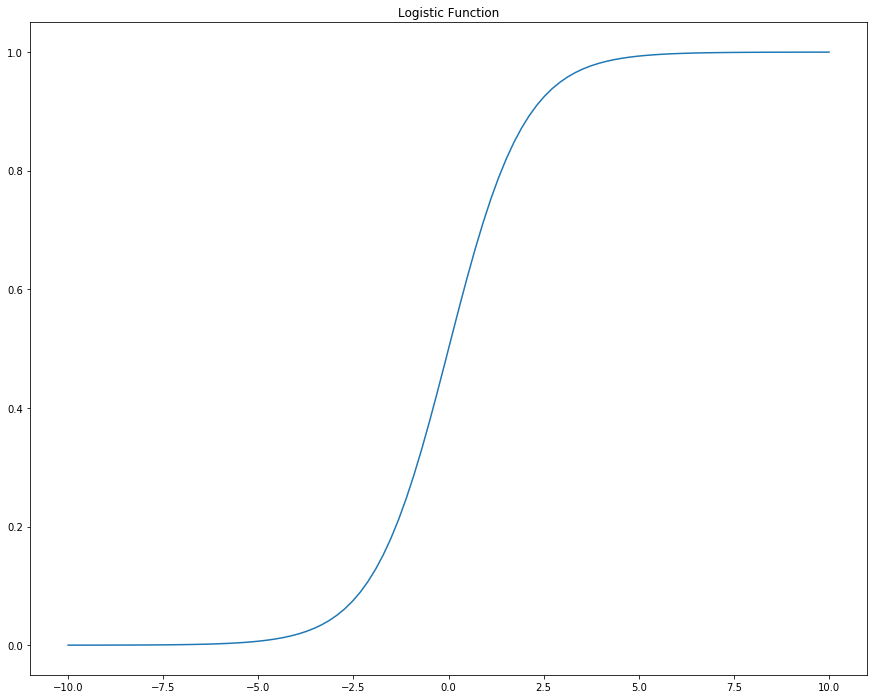

In [2]:
def logistic(x):
    """Apply the logistic function to x"""
    return 1 / (1 + math.exp(-x))

def logistic_prime(x):
    """Apply the derivative of the logistic function to x"""
    return logistic(x) * (1 - logistic(x))

if __name__ == "__main__":
    n = 100
    x = my_utils.linspace(-10, 10, 100)
    y = [logistic(x_i) for x_i in x]
    plt.plot(x,y)
    plt.title("Logistic Function")
    plt.draw()

### Fitting the Model
We will use these functions to fit the model:

$y_i = f(x_i \beta) * \varepsilon_i$

where $f$ is the `logistic` function defined above.

Here we will use gradient descent to maximize the likelihood of the data given our $\beta$, meaning that we need to calculate the likelihood function and its gradient.

Given some $\beta$, $y_i$ should equal 1 with probability $f(x_i \beta)$ and 0 with probability $1 - f(x_i\beta)$.

The pdf for $y_i$ can be written as:

$p(y_i|\beta) = f(x_i\beta)^{y_i}(1-f(x_i \beta))^{1-y_i}$

In practice it is easier to maximize the log likelihood given below:

$\log(L(\beta | x_i, y_i) = y_i \log f(x_i \beta) + (1-y_i)\log (1 - f(x_i \beta))$

Since $\log$ is monotonicly increasing, any $\beta$ which maximizes the log likelihood also maximizes the likelihood.

### Define Log Likelihood

In [3]:
def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i == 1:
        return math.log(logistic(Ch4.dot(x_i, beta)))
    else:
        return math.log(1 - logistic(Ch4.dot(x_i, beta)))

def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta) for x_i, y_i in zip(x, y))

### Define Gradient

In [12]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """Here i is the index of the data point and j is the index of the deriv"""
    return (y_i - logistic(Ch4.dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    """the gradient of the log likelihood corresponding to the ith data point"""
    return [logistic_log_partial_ij(x_i, y_i, beta, j)
            for j,_ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    return reduce(Ch4.vector_add,
                  [logistic_log_likelihood_i(x_i, y_i, beta)
                   for x_i, y_i in zip(x,y)])

### Generate some dummy data

We will generate data such that the positive example lie in the first quadrant, all else are negative

In [9]:
def rand_dat_pt():
    x1 = random.uniform(-1,1)
    x2 = random.uniform(-1,1)
    c = 1 if (x1 > 0 and x2 > 0) else 0
    return ((x1, x2), c)

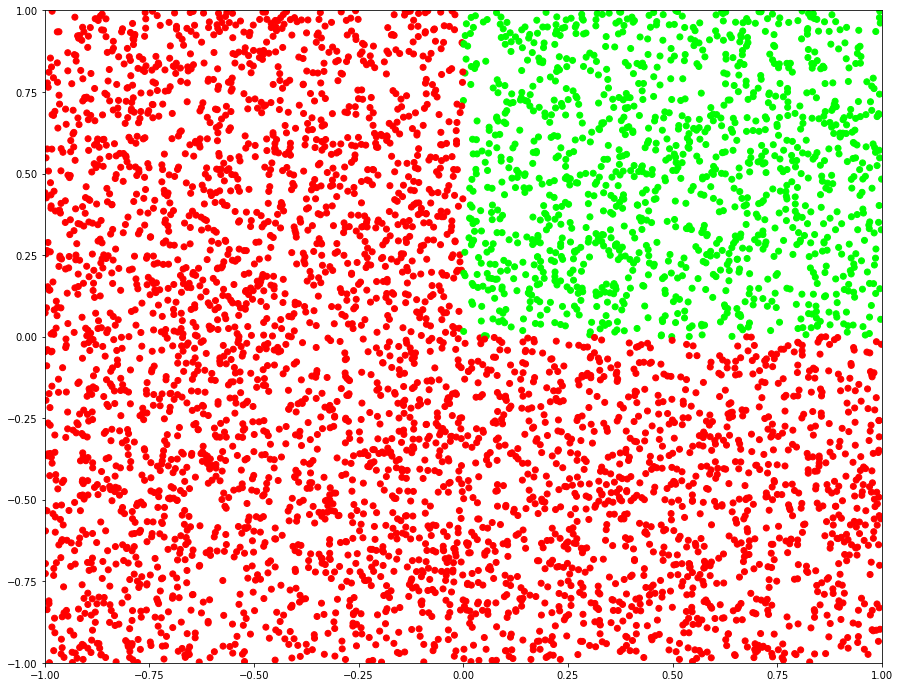

In [10]:
data = [rand_dat_pt() for _ in range(5000)]
x, y = zip(*data)

# rgba values for red and green (negative and positive)
red = [1, 0, 0, 1]
green = [0, 1, 0, 1]

# apply colors according to pos/neg
colors = [green if y_i == 1 else red for y_i in y]

# plot the data colored by label

plt.scatter(*zip(*x), c=colors)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.draw()

### Train Model

In [14]:
x_train, x_test, y_train, y_test = Ch11.train_test_split(x, y, 0.33)

# we want to maximize log likelihood on training data
fn = partial(logistic_log_likelihood, x_train, y_train)
gradient_fn = partial(logistic_log_gradient, x_train, y_train)

# random starting point
beta_0 = [random.random() for _ in range(2)]

# maximize using gradient descent
beta_hat = Ch8.maximize_stochastic(logistic_log_likelihood_i, 
                                   logistic_log_gradient_i,
                                   x_train, y_train, beta_0)

In [15]:
beta_hat

[2.4453342653064434, 2.363560079363365]

In [23]:
true_positives = false_positives = true_negatives = false_negatives = 0 
for x_i, y_i in zip(x_test, y_test):
    predict = logistic(Ch4.dot(beta_hat, x_i))
    if y_i == 1 and predict >= 0.5:
        # TP: paid and we predict paid 
        true_positives += 1
    elif y_i == 1: 
        false_negatives += 1
    elif predict >= 0.5: 
        false_positives += 1
    else:
        true_negatives += 1
# FN: paid and we predict unpaid
# FP: unpaid and we predict paid
# TN: unpaid and we predict unpaid
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

In [24]:
precision

0.49642857142857144

In [25]:
recall

1.0

In [21]:
true_negatives

822

In [22]:
false_negatives

0